## importing libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## load and read the data

In [5]:
data=pd.read_csv(r"C:\Users\HP\Downloads\Tesla.csv - Tesla.csv.csv")

## data exploring

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [7]:
data.isna().sum() ## check nulls 

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

#### the data doesnt have nulls values to deal with

In [8]:
## data types 
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

#### date columns concider an object so this need to change to date type 

In [9]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [10]:
data.shape

(1692, 7)

In [11]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [12]:
data.duplicated().sum()

np.int64(0)

## data preprocessing

In [13]:
data['Date']=pd.to_datetime(data['Date'])

In [14]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [15]:
print("maximum date value {}:".format(data['Date'].max()))

print("minimum date value {}:".format(data['Date'].min()))



maximum date value 2017-03-17 00:00:00:
minimum date value 2010-06-29 00:00:00:


####  we have around 7 years of data

## EDA

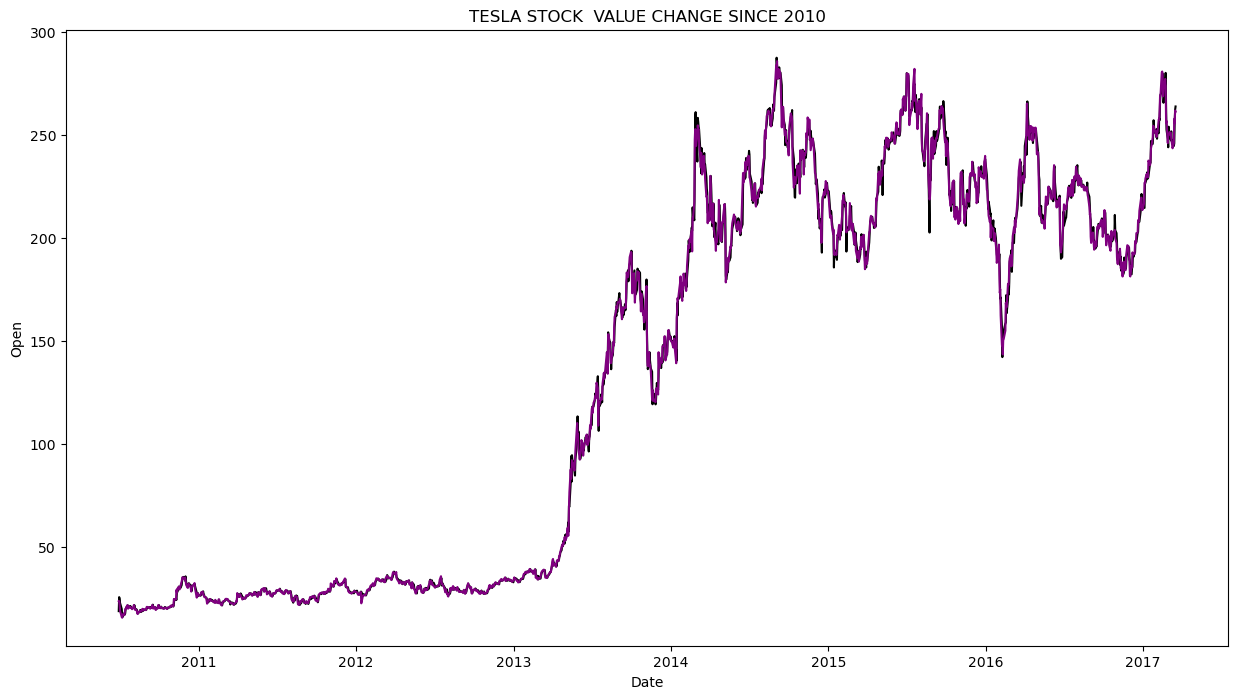

In [16]:
import matplotlib.dates as mdates
colors = ["#000000", "#800080"]
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=data,color=colors[0],x='Date',y='Open')
ax=sns.lineplot(data=data,color=colors[1],x='Date',y='Close')
plt.title("TESLA STOCK  VALUE CHANGE SINCE 2010")
plt.show()

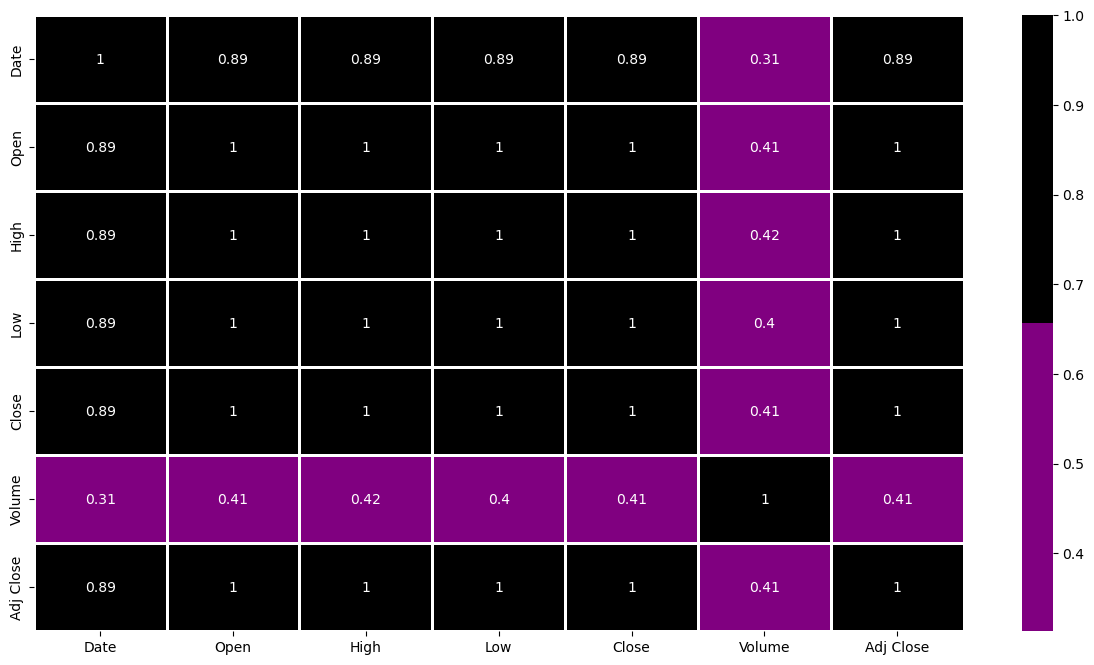

In [17]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap=[colors[1],colors[0]],linecolor='white',linewidth=2)
plt.show()

## valume has the least correlation in the map

## train test split

In [18]:
X=data['Open']
length=100
train_set=X.iloc[:1000].values
test_set=X.iloc[1000:]


In [19]:


train_set = np.asarray(train_set).reshape(-1, 1)
test_set  = np.asarray(test_set).reshape(-1, 1)


sc = MinMaxScaler(feature_range=(0, 1))

train_set_scaled = sc.fit_transform(train_set)
test_set_scaled  = sc.transform(test_set)

print(train_set_scaled.shape)
print(test_set_scaled.shape)



(1000, 1)
(692, 1)


In [20]:
X_train, y_train = [], []

for i in range(length, len(train_set_scaled)):
    X_train.append(train_set_scaled[i-length:i, 0])
    y_train.append(train_set_scaled[i, 0])

X_test, y_test = [], []

for i in range(length, len(test_set_scaled)):
    X_test.append(test_set_scaled[i-length:i, 0])
    y_test.append(test_set_scaled[i, 0])

# Convert to NumPy
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Reshape for LSTM: (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(900, 100, 1) (900,)
(592, 100, 1) (592,)


### Building Models

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(
    units=50,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1)
))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))




In [25]:

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 392ms/step - loss: 0.0247 - val_loss: 0.0121
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 323ms/step - loss: 0.0047 - val_loss: 0.0059
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - loss: 0.0036 - val_loss: 0.0167
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 330ms/step - loss: 0.0034 - val_loss: 0.0053
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 332ms/step - loss: 0.0038 - val_loss: 0.0134
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 346ms/step - loss: 0.0031 - val_loss: 0.0057
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - loss: 0.0033 - val_loss: 0.0081
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 341ms/step - loss: 0.0035 - val_loss: 0.0064
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 344ms/step - loss: 0.0032 - val_loss: 0.0106
Epoch 12/100
29/29 ━━━━━━━━━━━━━

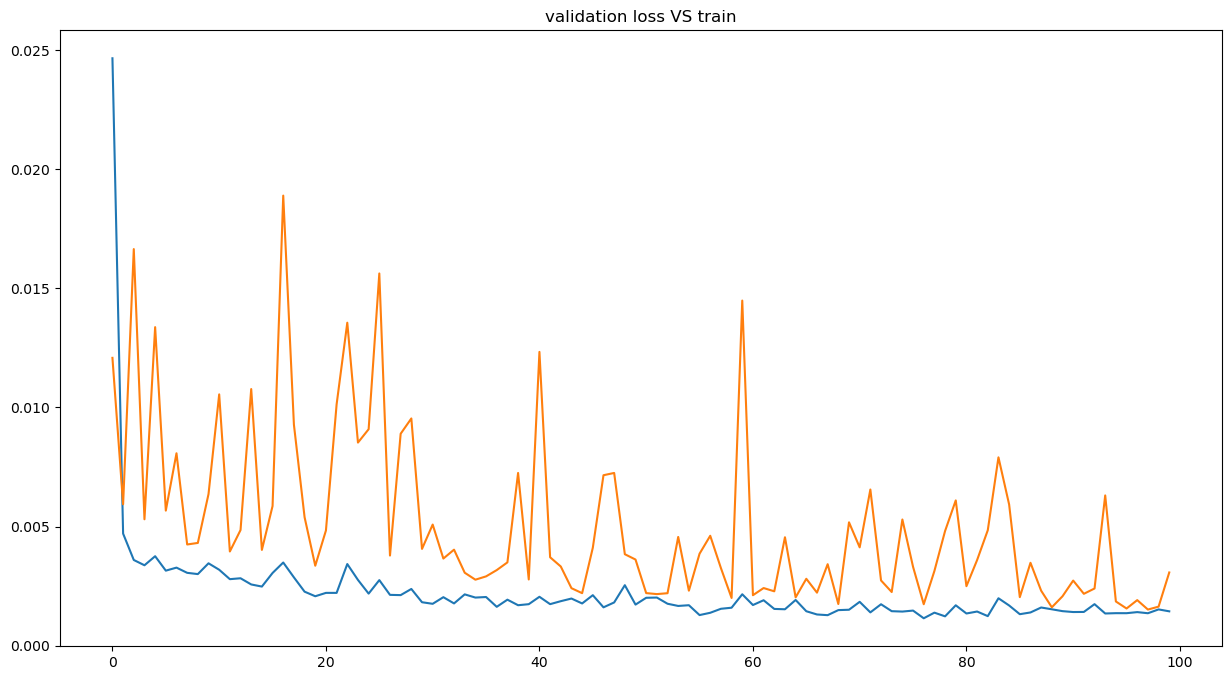

In [28]:
loss=pd.DataFrame(model.history.history)
fig=plt.figure(figsize=(15,8))
plt.plot(loss)
plt.title("validation loss VS train")
plt.show()

## testing model

In [31]:
pred=model.predict(X_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test
test['pred']=pred.flatten()
test



19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step 


,test,pred
0,0.909673,0.946506
1,0.923708,0.945481
2,0.952960,0.945884
3,0.956632,0.950440
4,0.954102,0.958297
...,...,...
587,0.932969,0.959509
588,0.938232,0.957208
589,0.982661,0.955042
590,1.004692,0.957982


## plotting test vs pred 

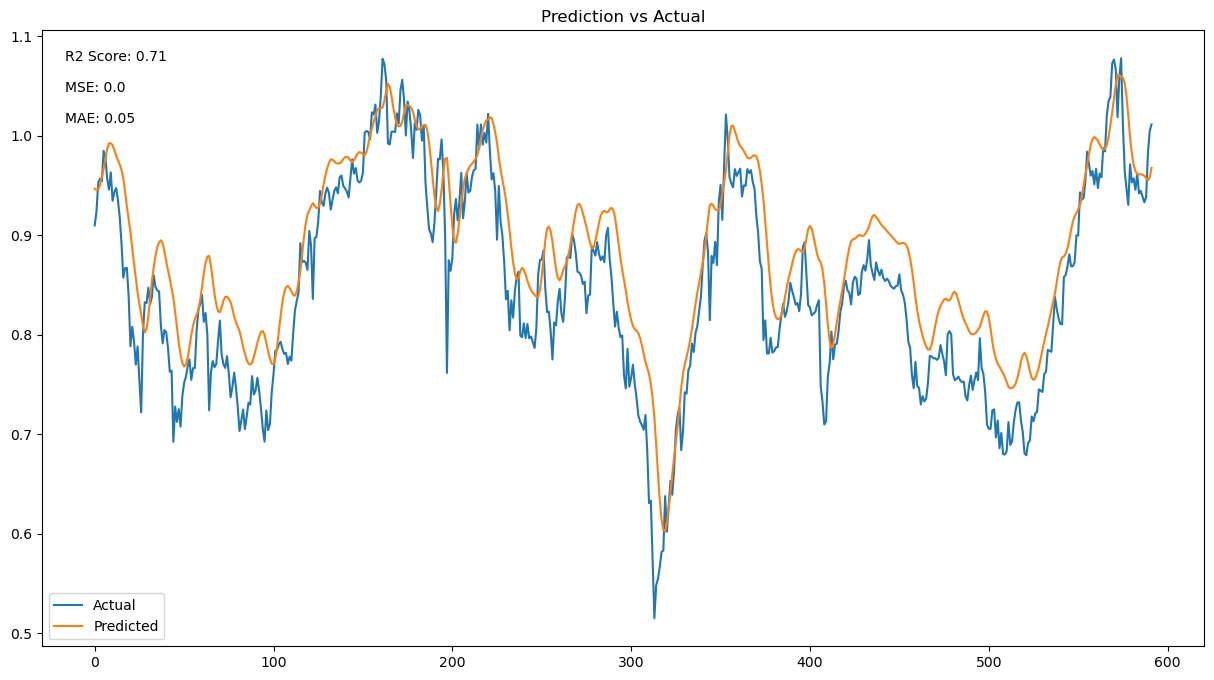

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
pred = pred.reshape(-1)

fig = plt.figure(figsize=(15, 8))
plt.title("Prediction vs Actual")

plt.plot(y_test, label='Actual')
plt.plot(pred, label='Predicted')

plt.legend()

# Metrics
r2  = np.round(r2_score(y_test, pred), 2)
mae = np.round(mean_absolute_error(y_test, pred), 2)
mse = np.round(mean_squared_error(y_test, pred), 2)

# Display metrics on plot (non-overlapping)
plt.text(0.02, 0.95, f'R2 Score: {r2}', transform=plt.gca().transAxes)
plt.text(0.02, 0.90, f'MSE: {mse}', transform=plt.gca().transAxes)
plt.text(0.02, 0.85, f'MAE: {mae}', transform=plt.gca().transAxes)

plt.show()

